Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

from yahoo_fin.stock_info import get_data

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'BTC'
against_currency = 'USD'

start = dt.datetime(2013,5,1)
end = dt.datetime.now()

base_df = get_data(f'{crypto_currency}-{against_currency}', start, end, index_as_date = True, interval = '1d')
base_df

,open,high,low,close,adjclose,volume,ticker
2014-09-16,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07,BTC-USD
2014-09-17,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,BTC-USD
2014-09-18,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,BTC-USD
2014-09-19,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,BTC-USD
2014-09-20,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,BTC-USD
...,...,...,...,...,...,...,...
2021-06-30,35035.984375,35035.984375,32883.781250,33572.117188,33572.117188,3.783896e+10,BTC-USD
2021-07-01,33549.601562,33939.589844,32770.679688,33897.046875,33897.046875,3.872897e+10,BTC-USD
2021-07-02,33854.421875,34909.261719,33402.695312,34668.546875,34668.546875,2.438396e+10,BTC-USD
2021-07-03,34665.566406,35937.566406,34396.476562,35287.781250,35287.781250,2.492431e+10,BTC-USD


In [3]:
base_df['spread'] = base_df.high - base_df.low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2484 entries, 2014-09-16 to 2021-07-04
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      2480 non-null   float64
 1   high      2480 non-null   float64
 2   low       2480 non-null   float64
 3   close     2480 non-null   float64
 4   adjclose  2480 non-null   float64
 5   volume    2480 non-null   float64
 6   ticker    2484 non-null   object 
 7   spread    2480 non-null   float64
dtypes: float64(7), object(1)
memory usage: 174.7+ KB


## Plot the closing value of aave over time

Text(0.5, 1.0, 'Closing price distribution of BTC')

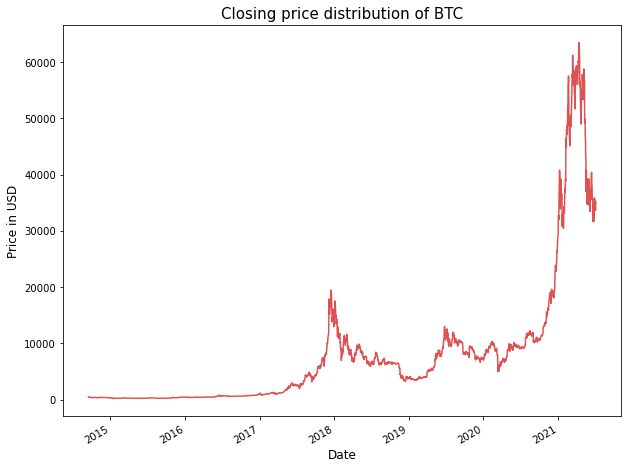

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10,8))

sns.lineplot(y = base_df.close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of BTC", fontsize=15)

Text(0.5, 1.0, 'Daily price spread of BTC')

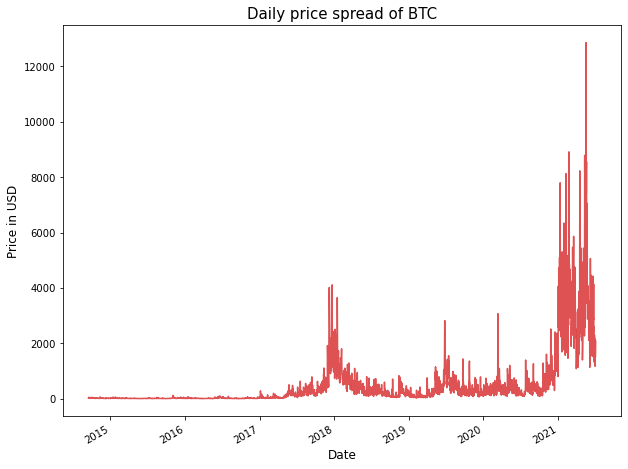

In [5]:
fig, ax = plt.subplots(figsize=(10,8))

sns.lineplot(y = base_df.spread.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Daily price spread of BTC", fontsize=15)

## Candlestick chart

In [6]:
import matplotlib.ticker as mticker
import mplfinance as mpf

temp_base_df = base_df.copy(deep=False)

temp_base_df = temp_base_df.drop(['spread'], axis=1)
temp_base_df

,open,high,low,close,adjclose,volume,ticker
2014-09-16,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07,BTC-USD
2014-09-17,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,BTC-USD
2014-09-18,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,BTC-USD
2014-09-19,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,BTC-USD
2014-09-20,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,BTC-USD
...,...,...,...,...,...,...,...
2021-06-30,35035.984375,35035.984375,32883.781250,33572.117188,33572.117188,3.783896e+10,BTC-USD
2021-07-01,33549.601562,33939.589844,32770.679688,33897.046875,33897.046875,3.872897e+10,BTC-USD
2021-07-02,33854.421875,34909.261719,33402.695312,34668.546875,34668.546875,2.438396e+10,BTC-USD
2021-07-03,34665.566406,35937.566406,34396.476562,35287.781250,35287.781250,2.492431e+10,BTC-USD


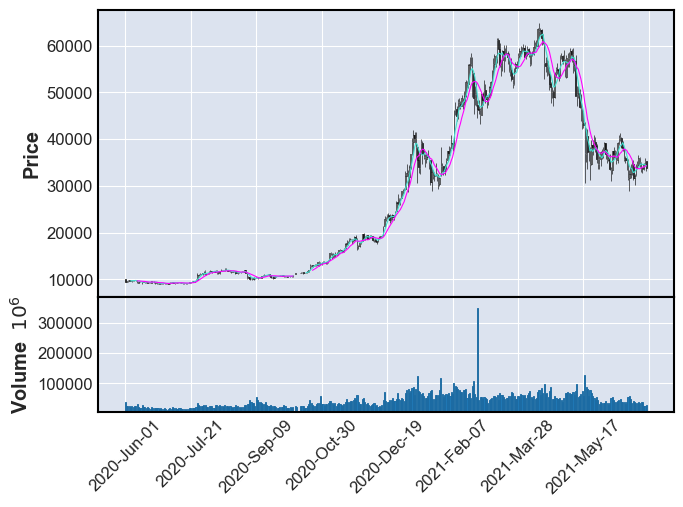

In [7]:
mpf.plot(temp_base_df.loc['2020-6-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [8]:
from fbprophet import Prophet

In [9]:
price_predict_df = base_df['close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
#price_predict_df = price_predict_df[price_predict_df['ds']>'2020-6-1']
price_predict_df

,ds,y
0,2014-09-16,457.334015
1,2014-09-17,424.440002
2,2014-09-18,394.795990
3,2014-09-19,408.903992
4,2014-09-20,398.821014
...,...,...
2479,2021-06-30,33572.117188
2480,2021-07-01,33897.046875
2481,2021-07-02,34668.546875
2482,2021-07-03,35287.781250


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
2502,2021-07-30,46060.115206,42535.992799,49801.904811
2503,2021-07-31,46098.666673,42422.346536,49200.418764
2504,2021-08-01,46120.578618,42532.068990,49826.008627
2505,2021-08-02,46155.479772,42394.664806,49750.872579
2506,2021-08-03,46162.809457,42418.247944,49918.027053


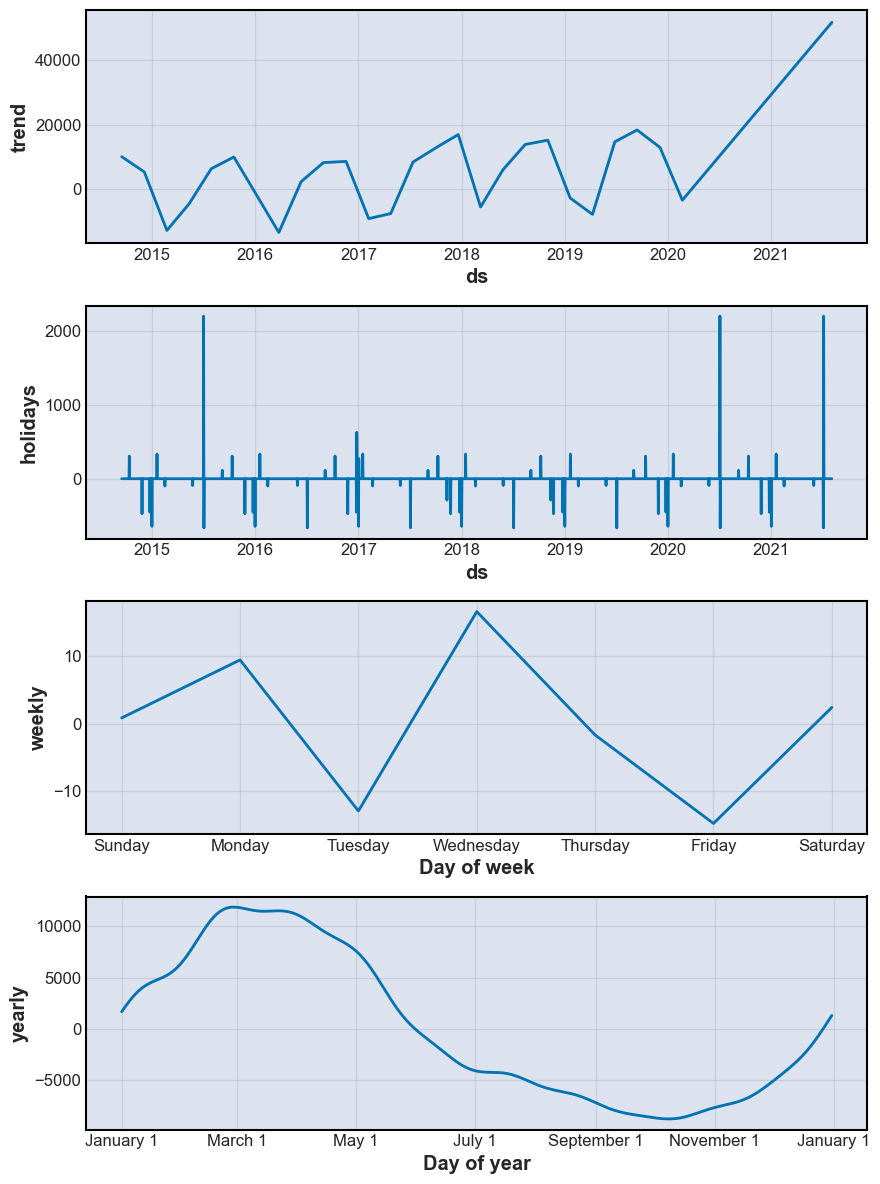

In [10]:
m = Prophet(changepoint_prior_scale=.7)
#m.add_country_holidays(country_name='US')
m.add_country_holidays(country_name='US')
m.fit(price_predict_df);
m.train_holiday_names

future = m.make_future_dataframe(periods=30)

forecast = m.predict(future)
fig = m.plot_components(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

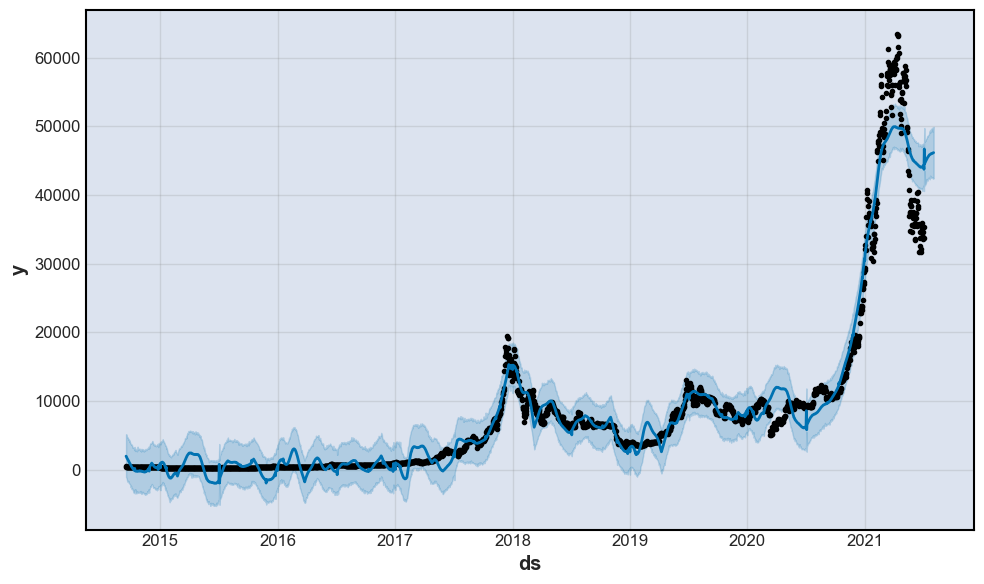

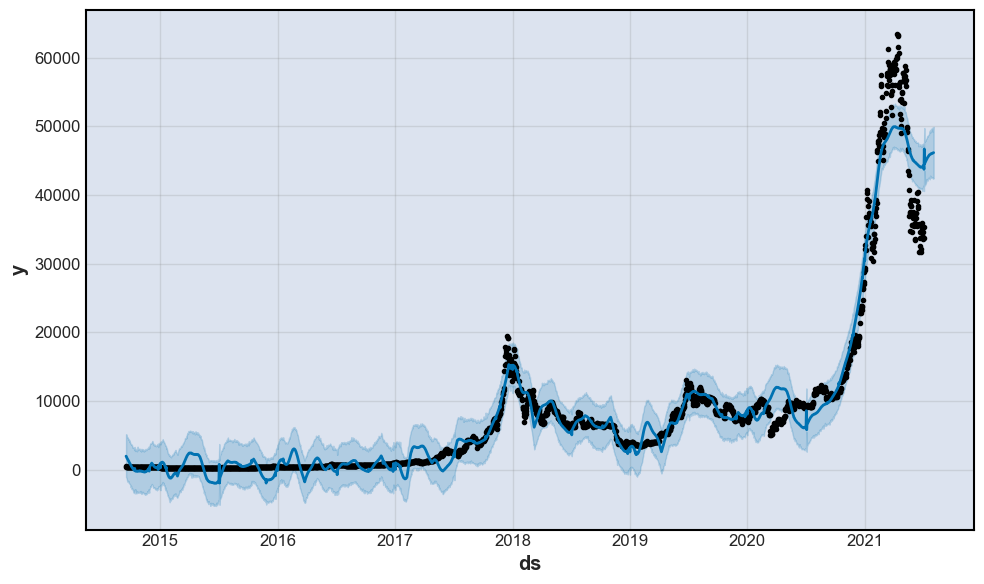

In [11]:
m.plot(forecast)